In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import train and test data
train_data=pd.read_csv("C:\\Users\\thehockey_freak!\\Documents\\Nuclei\\Project1\\Train_UWu5bXk.csv")
test_data=pd.read_csv("C:\\Users\\thehockey_freak!\\Documents\\Nuclei\\Project1\\Test_u94Q5KV.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train_data.shape

(8523, 12)

In [7]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#fill missing item_weight
train_data['Item_Weight'].fillna(train_data['Item_Weight'].median(),inplace=True)

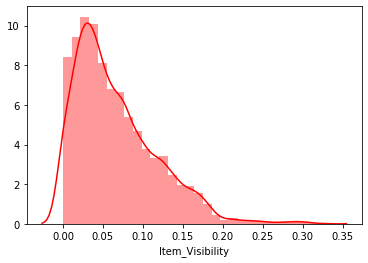

In [9]:
#item_weight distribution
train_data['Item_Weight'].isnull().sum()
plt.figure()
sns.distplot(train_data.Item_Visibility,bins=30, color='r')

plt.show()

In [10]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
train_data['Outlet_Size'].fillna("Other",inplace=True)

In [12]:
train_data['Outlet_Size'].isnull().sum()

0

In [13]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Text(0.5, 0, 'Item visibility')

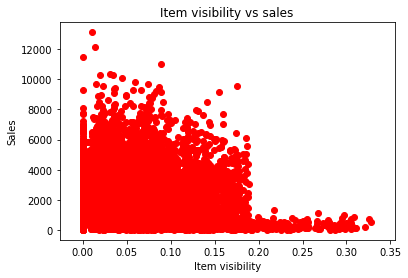

In [14]:
train_data['Item_Visibility'].replace({0:train_data['Item_Visibility'].median()}, inplace=True)

#correct mismatched values

train_data['Item_Fat_Content'].replace({"low fat":"Low Fat"}, inplace=True)
train_data['Item_Fat_Content'].replace({"reg":"Regular"}, inplace=True)
train_data['Item_Fat_Content'].replace({"LF":"Low Fat"}, inplace=True)

Text(0.5, 0, 'Item visibility')

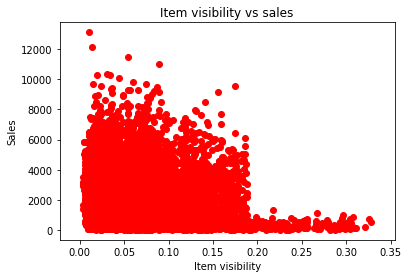

In [15]:
plt.figure()
plt.scatter(train_data.Item_Visibility,train_data.Item_Outlet_Sales,color="red")

plt.title('Item visibility vs sales')
plt.ylabel('Sales')
plt.xlabel('Item visibility')

In [17]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Text(0.5, 0, 'Sales')

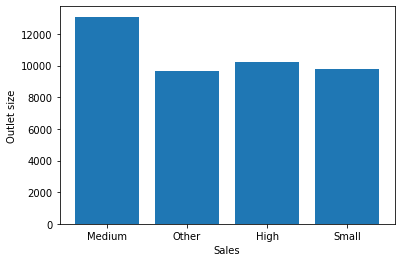

In [16]:
plt.figure()
plt.bar(train_data.Outlet_Size, train_data.Item_Outlet_Sales)

plt.ylabel('Outlet size')
plt.xlabel('Sales')

In [19]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [20]:
type_palette = ['#78C850',  # Fruits and Vegetables  
                '#F08030',  # Snack Foods
                '#6890F0',  # Household       
                '#A8B820',  # Frozen Foods 
                '#A8A878',  # Dairy    
                '#A040A0',  # Canned     
                '#F8D030',  # Baking Goods  
                '#E0C068',  # Health and Hygiene
                '#EE99AC',  # Soft Drinks
                '#C03028',  # Meat
                '#F85888',  # Breads
                '#B8A038',  # Hard Drinks
                '#705898',  # Others
                '#98D8D8',  # Starchy Foods
                '#7038F8',  # Breakfast
                'Purple',  # Seafood
                ]

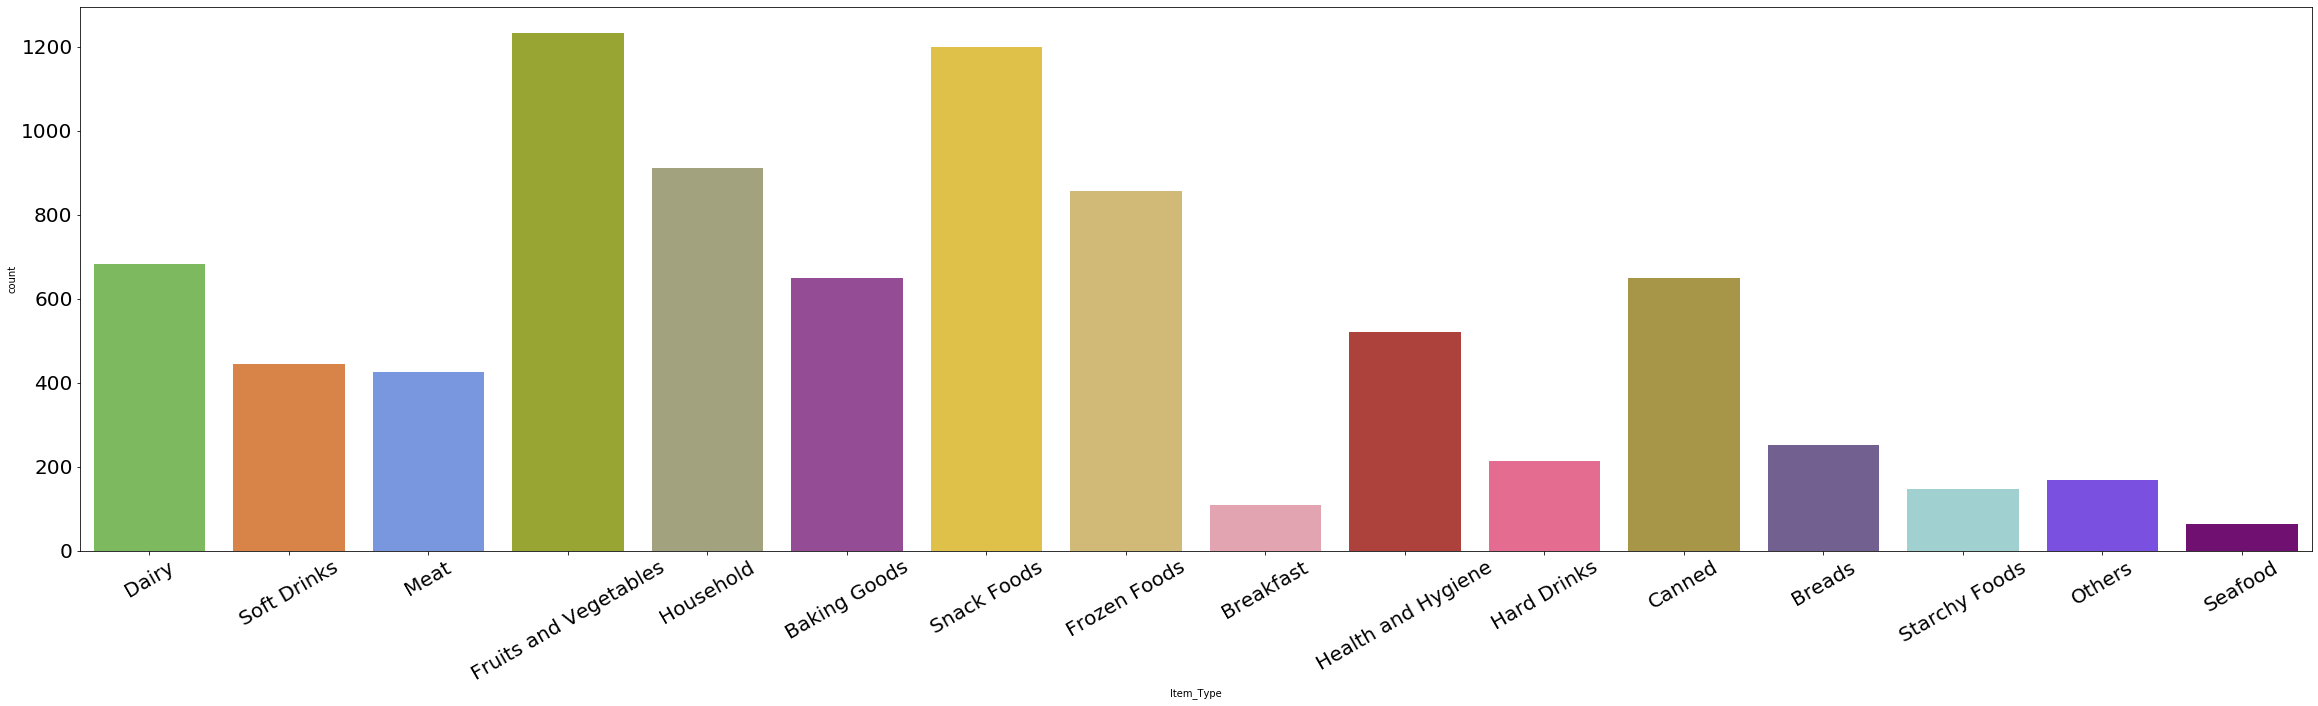

In [21]:
plt.figure(figsize=(40,10))
sns.countplot(x='Item_Type',data=train_data, palette=type_palette)
# Rotate x-labels
plt.xticks(size=20,rotation=30)#rotates the names so that they dont overlap
plt.yticks(size=20)
plt.show()

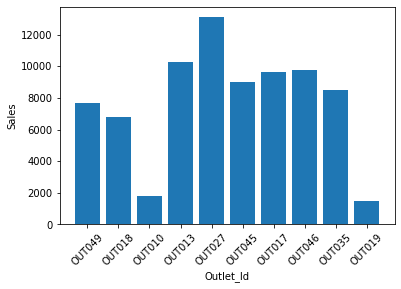

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [22]:
plt.figure()
plt.bar(train_data.Outlet_Identifier, train_data.Item_Outlet_Sales)

plt.xticks(rotation=45)

plt.xlabel('Outlet_Id')
plt.ylabel('Sales')

plt.show()
train_data['Outlet_Identifier'].value_counts()

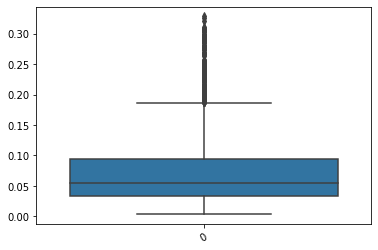

In [23]:
plt.figure()
sns.boxplot(data=train_data['Item_Visibility'])
plt.xticks(rotation=30)
plt.show()

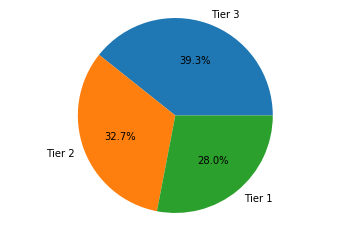

In [24]:
labels = ['Tier 3', 'Tier 2', 'Tier 1']
sizes = [train_data['Outlet_Location_Type'].value_counts()[0],
         train_data['Outlet_Location_Type'].value_counts()[1],
         train_data['Outlet_Location_Type'].value_counts()[2],
        ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [25]:
train_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

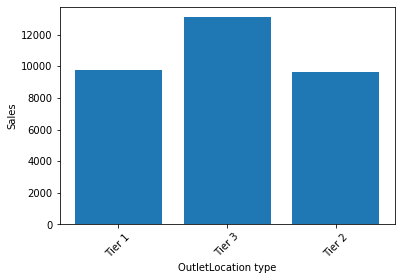

In [26]:
plt.figure()
plt.bar(train_data.Outlet_Location_Type, train_data.Item_Outlet_Sales)

plt.xticks(rotation=45)

plt.xlabel('OutletLocation type')
plt.ylabel('Sales')

plt.show()

In [28]:
train_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Other,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


Text(0.5, 0, 'Item mrp')

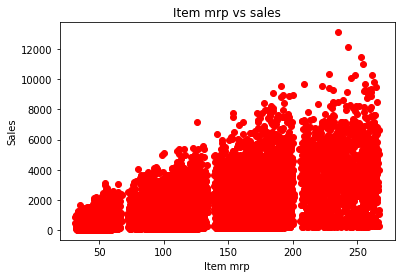

In [29]:
plt.figure()
plt.scatter(train_data.Item_MRP,train_data.Item_Outlet_Sales,color="red")

plt.title('Item mrp vs sales')
plt.ylabel('Sales')
plt.xlabel('Item mrp')


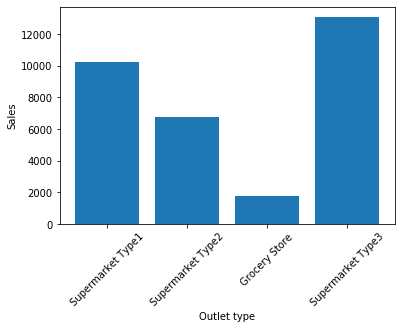

In [30]:
plt.figure()
plt.bar(train_data.Outlet_Type, train_data.Item_Outlet_Sales)

plt.xticks(rotation=45)

plt.xlabel('Outlet type')
plt.ylabel('Sales')

plt.show()

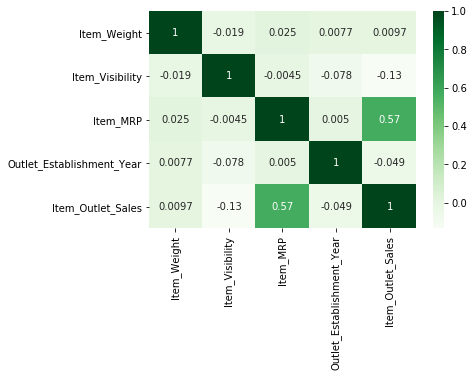

In [31]:
corr = train_data.corr()# plot the heatmap
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

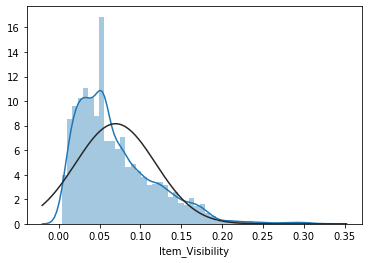

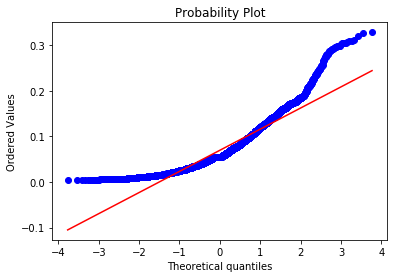

In [18]:
#checking skewness
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(train_data['Item_Visibility'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['Item_Visibility'], plot=plt)

In [28]:
print(skew(train_data['Item_Visibility']))

1.318710616727527


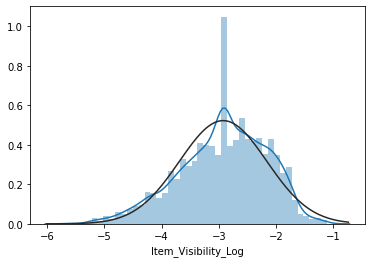

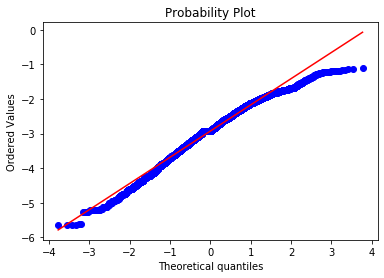

In [29]:
#log transformation to reduce skew
train_data['Item_Visibility_Log']=np.log(train_data['Item_Visibility'])
plt.figure()
sns.distplot(train_data['Item_Visibility_Log'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['Item_Visibility_Log'], plot=plt)
plt.show()

In [30]:
print(skew(train_data['Item_Visibility_Log']))

-0.4396631184154264


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


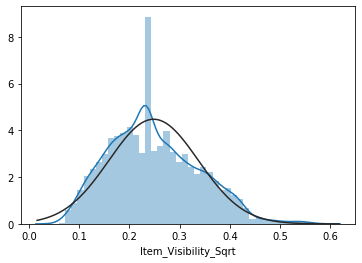

<Figure size 432x288 with 0 Axes>

In [19]:
#square root transformation to reduce skew
res=np.sqrt(train_data['Item_Visibility'])
train_data['Item_Visibility_Sqrt']=res
sns.distplot(train_data['Item_Visibility_Sqrt'], fit=norm)
fig = plt.figure()
fig.show()

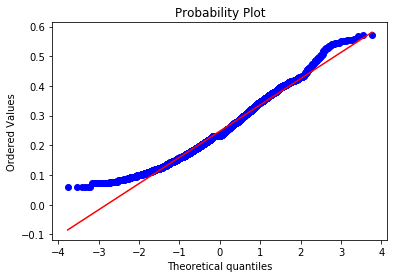

In [39]:
res = stats.probplot(train_data['Item_Visibility_Sqrt'], plot=plt)
plt.show()

In [40]:
train_data['Item_Visibility_Sqrt'].head()

0    0.126678
1    0.138846
2    0.129461
3    0.232230
4    0.232230
Name: Item_Visibility_Sqrt, dtype: float64

In [39]:
num_data = train_data.select_dtypes(include=[np.number])
cat_data = train_data.select_dtypes(exclude=[np.number])

In [40]:
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_Log,Item_Visibility_Sqrt
0,9.30,0.016047,249.8092,1999,3735.1380,-4.132215,0.126678
1,5.92,0.019278,48.2692,2009,443.4228,-3.948780,0.138846
2,17.50,0.016760,141.6180,1999,2097.2700,-4.088756,0.129461
3,19.20,0.053931,182.0950,1998,732.3800,-2.920051,0.232230
4,8.93,0.053931,53.8614,1987,994.7052,-2.920051,0.232230


In [41]:
cat_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Other,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [42]:
# Standardizing numerical columns
from sklearn.preprocessing import StandardScaler
stand_scale= StandardScaler()
column_transform = num_data.columns
num_data.loc[:, column_transform] = stand_scale.fit_transform(num_data.loc[:, column_transform])
num_data.head()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_Log,Item_Visibility_Sqrt
0,-0.831187,-1.092518,1.747454,0.139541,0.910601,-1.581318,-1.362352
1,-1.630810,-1.026432,-1.489023,1.334103,-1.018440,-1.340908,-1.225761
2,1.108727,-1.077939,0.010040,0.139541,-0.049238,-1.524361,-1.331114
3,1.510904,-0.317641,0.660050,0.020085,-0.849103,0.007346,-0.177484
4,-0.918719,-0.317641,-1.399220,-1.293934,-0.695373,0.007346,-0.177484


In [43]:
cat_data['Outlet_Establishment_Year']=train_data['Outlet_Establishment_Year']
cat_data.head()
num_data.drop('Outlet_Establishment_Year',axis='columns',inplace=True)
num_data.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Visibility_Log,Item_Visibility_Sqrt
0,-0.831187,-1.092518,1.747454,0.910601,-1.581318,-1.362352
1,-1.630810,-1.026432,-1.489023,-1.018440,-1.340908,-1.225761
2,1.108727,-1.077939,0.010040,-0.049238,-1.524361,-1.331114
3,1.510904,-0.317641,0.660050,-0.849103,0.007346,-0.177484
4,-0.918719,-0.317641,-1.399220,-0.695373,0.007346,-0.177484


0.1271798803336854


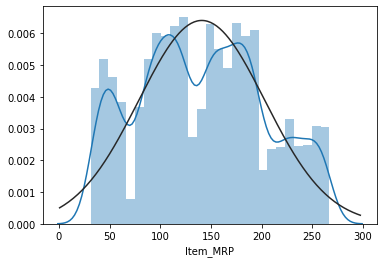

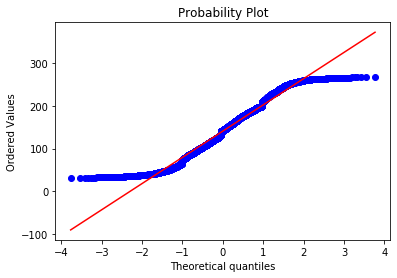

In [44]:
sns.distplot(train_data['Item_MRP'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['Item_MRP'], plot=plt)
print(skew(train_data['Item_MRP']))

0.12182405058759048


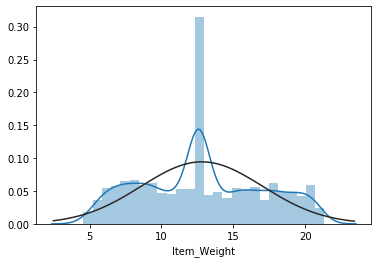

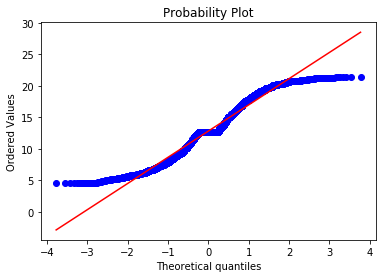

In [45]:
sns.distplot(train_data['Item_Weight'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['Item_Weight'], plot=plt)
print(skew(train_data['Item_Weight']))

In [46]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Log,Item_Visibility_Sqrt
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,-4.132215,0.126678
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,-3.948780,0.138846
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,-4.088756,0.129461
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800,-2.920051,0.232230
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,-2.920051,0.232230


In [41]:
train_data.drop('Item_Visibility_Log',axis='columns',inplace=True)
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Sqrt
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800,0.232230
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.232230


NameError: name 'test' is not defined

In [49]:
# var_mod = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# for i in var_mod:
#     test[i] = le.ﬁt_transform(test[i].astype(str))
# test.dtypes

In [21]:
test.head()

NameError: name 'test' is not defined

In [51]:
new_sales=train_data['Item_Outlet_Sales'].median()
test_data['Item_Outlet_Sales']=new_sales

In [52]:
comb=pd.concat([train_data,test_data],axis=0)

In [53]:
comb.shape

(14204, 13)

In [54]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Sqrt
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800,0.232230
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.232230


In [42]:
OC=train_data['Outlet_Identifier'].value_counts()
type(train_data)

pandas.core.frame.DataFrame

In [43]:
IC=train_data['Item_Identifier'].value_counts()

In [44]:
train_data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [45]:
train_data['Outlet_Year']=2013-train_data['Outlet_Establishment_Year']
train_data['Outlet_Year']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Year, Length: 8523, dtype: int64

In [59]:
train_data.drop('Outlet_Establishment_Year',axis='columns',inplace=True)
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Sqrt,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,0.138846,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461,14
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,Other,Tier 3,Grocery Store,732.3800,0.232230,15
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,0.232230,26


In [60]:
#train_data.drop('Outlet_Count',axis='columns',inplace=True)

substr=train_data['Item_Identifier'][0:1]

In [46]:
#replace item_identifier 
for i in range(0, len(train_data)): 
    train_data['Item_Id'] = train_data['Item_Identifier'].str.slice(0, 2) 
    train_data['Item_Id'].replace({"FD":"Food"}, inplace=True)
    train_data['Item_Id'].replace({"DR":"Drink"}, inplace=True)
    train_data['Item_Id'].replace({"NC":"Non consumable"}, inplace=True)
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Sqrt,Outlet_Year,Item_Id
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846,4,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461,14,Food
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800,0.232230,15,Food
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.232230,26,Non consumable


In [54]:
#train_data.drop('Item_Identifier',axis='columns',inplace=True)
num_data = train_data.select_dtypes(include=[np.number])
cat_data = train_data.select_dtypes(exclude=[np.number])
num_data.drop('Outlet_Establishment_Year',axis=1,inplace=True)

train_data.drop(['Item_Identifier','Item_Type'],axis=1,inplace=True)
train_data.head()

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Sqrt,Outlet_Year,Item_Id
0,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678,14,Food
1,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846,4,Drink
2,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461,14,Food
3,19.20,Regular,0.053931,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800,0.232230,15,Food
4,8.93,Low Fat,0.053931,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.232230,26,Non consumable


In [55]:
train_data.drop('Outlet_Establishment_Year',axis=1,inplace=True)
var_mod = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in var_mod:
    train_data[i] = le.ﬁt_transform(train_data[i].astype(str))
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Sqrt,Outlet_Year,Item_Id
0,9.30,0,0.016047,249.8092,OUT049,1,0,1,3735.1380,0.126678,14,Food
1,5.92,1,0.019278,48.2692,OUT018,1,2,2,443.4228,0.138846,4,Drink
2,17.50,0,0.016760,141.6180,OUT049,1,0,1,2097.2700,0.129461,14,Food
3,19.20,1,0.053931,182.0950,OUT010,2,2,0,732.3800,0.232230,15,Food
4,8.93,0,0.053931,53.8614,OUT013,0,2,1,994.7052,0.232230,26,Non consumable


In [56]:
train_data.rename(columns={'Item_Id':'Item_Type_New'},inplace=True)

In [57]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Sqrt,Outlet_Year,Item_Type_New
0,9.30,0,0.016047,249.8092,OUT049,1,0,1,3735.1380,0.126678,14,Food
1,5.92,1,0.019278,48.2692,OUT018,1,2,2,443.4228,0.138846,4,Drink
2,17.50,0,0.016760,141.6180,OUT049,1,0,1,2097.2700,0.129461,14,Food
3,19.20,1,0.053931,182.0950,OUT010,2,2,0,732.3800,0.232230,15,Food
4,8.93,0,0.053931,53.8614,OUT013,0,2,1,994.7052,0.232230,26,Non consumable


In [58]:
train_data = pd.get_dummies(train_data, columns=['Outlet_Identifier','Item_Type_New'], drop_first=True)

In [59]:
train_data.sample(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Sqrt,Outlet_Year,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Type_New_Food,Item_Type_New_Non consumable
4521,17.600,0,0.104792,165.2868,0,2,1,3111.9492,0.323715,26,...,0,0,0,0,0,0,0,0,1,0
5883,9.300,0,0.042464,121.9388,1,2,2,1114.5492,0.206067,4,...,0,1,0,0,0,0,0,0,0,0
3024,17.850,0,0.018052,96.6094,1,0,1,856.8846,0.134358,14,...,0,0,0,0,0,0,0,1,0,1
7649,8.300,0,0.035409,36.2506,1,0,1,834.9132,0.188174,14,...,0,0,0,0,0,0,0,1,1,0
6506,12.150,0,0.018515,252.7698,2,1,1,5834.4054,0.136069,6,...,1,0,0,0,0,0,0,0,1,0
8267,9.285,1,0.021039,160.0578,1,0,1,2567.3248,0.145049,14,...,0,0,0,0,0,0,0,1,1,0
3938,20.000,1,0.104083,107.4622,3,0,1,3705.1770,0.322620,16,...,0,0,0,0,0,0,1,0,1,0
918,12.600,0,0.172310,98.2042,3,0,0,198.4084,0.415102,28,...,0,0,1,0,0,0,0,0,1,0
7726,5.365,1,0.140214,173.7764,3,1,1,4637.9628,0.374451,9,...,0,0,0,0,1,0,0,0,1,0
3594,13.000,1,0.044985,175.0054,3,0,1,1926.1594,0.212096,16,...,0,0,0,0,0,0,1,0,0,0


In [71]:
#train_data.drop('Item_Identifier',axis=1,inplace=True)
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [4])], remainder='passthrough')
#train_data = np.array(ct.fit_transform(train_data), dtype = np.str)


In [69]:
X=train_data.loc[:, train_data.columns != 'Item_Outlet_Sales']
y=train_data.iloc[:,[7]]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [71]:
#model1
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print("intercept:", lr.intercept_) 
print("coefficients of predictors:", lr.coef_) 

intercept: [-450.66666508]
coefficients of predictors: [[-5.91904905e-01  4.17133319e+01 -6.76322736e+01  1.55565955e+01
  -1.86361003e+02 -4.40305398e+02  1.04872329e+03 -1.03966729e+02
  -8.28070843e+00  6.09245164e+02  4.48666795e+02 -7.42890536e+02
  -5.69299292e+02  1.34005517e+02  7.00612909e+02  3.18301605e+02
   1.73796013e+02 -1.18134676e+02  1.66345752e+01 -1.15727463e+01]]


In [87]:
y_pred = lr.predict(X)
y_pred

array([[4060.68594516],
       [ 577.16921747],
       [2372.40807208],
       ...,
       [1509.24074092],
       [1412.83542101],
       [1220.46764153]])

In [89]:
lr.score(X,y)

0.563489814892737

In [92]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y, y_pred))
print(rmse)

1127.3996776676784


In [96]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [97]:
lr.score(X_test,y_test)

0.5699263398256291

In [101]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

1093.5760956296779


In [110]:
#model2
from sklearn.tree import DecisionTreeRegressor
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [111]:
y_pred=dt.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

1531.023893297766


In [112]:
#model3
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [113]:
y_pred=rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

1113.6755576122591
